In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from warnings import filterwarnings
filterwarnings(action='ignore')

# AFIT Dataset

In [3]:
afit = pd.read_csv('../data/afit.csv',index_col=0)

In [5]:
#Divide the dataframe into each runs

R6 = afit[afit['Run']=='R6']
R7 = afit[afit['Run']=='R7']
R8 = afit[afit['Run']=='R8']

run_list = [R6,R7,R8]

In [6]:
# Visualize the STLE Profile
for j in run_list:
    plt.figure(figsize=(12,6))
    
    plt.plot(j['time'],j['x1'])
    plt.xlabel('Time (s)')
    plt.ylabel('Pressure')
    plt.title(f"AFIT {j['Run'].iloc[0]}")
    
    for i in range(14):
        plt.axhline(j['px'+str(i+1)].iloc[0],ls='--',color='red')
    
    plt.savefig(f"../code/figures/AFIT/STLE Profile/AFIT_figure_{j['Run'].iloc[0]}")
    plt.close()

# Neural Net

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [8]:
train_run = ['R8']
test_run = ['R6','R7']

In [9]:
train_set = R8
test_set = pd.concat([R6,R7])

In [10]:
X_train = train_set.drop(['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
       'px11', 'px12', 'px13', 'px14','H','W','L','Run','time'],axis=1)
X_test = test_set.drop(['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
       'px11', 'px12', 'px13', 'px14','H','W','L','Run','time'],axis=1)

y_train = train_set['x1']
y_test = test_set['x1']

In [11]:
model = Sequential()

model.add(Dense(20, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(10, activation='relu'))

model.add(Dense(1))


initial_lr = 0.01

optimizer = Adam(learning_rate=initial_lr)

model.compile(optimizer=optimizer,loss='mse')
early_stopping = EarlyStopping(monitor='val_loss', patience=30, mode='min', verbose=1)
    
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=500)

Epoch 1/500
47/47 [==============================] - 0s 3ms/step - loss: 23.4112 - val_loss: 114.4290
Epoch 2/500
47/47 [==============================] - 0s 1ms/step - loss: 0.2278 - val_loss: 110.1064
Epoch 3/500
47/47 [==============================] - 0s 1ms/step - loss: 0.1506 - val_loss: 107.9187
Epoch 4/500
47/47 [==============================] - 0s 1ms/step - loss: 0.1402 - val_loss: 102.2550
Epoch 5/500
47/47 [==============================] - 0s 1ms/step - loss: 0.1285 - val_loss: 99.1425
Epoch 6/500
47/47 [==============================] - 0s 1ms/step - loss: 0.1204 - val_loss: 94.3413
Epoch 7/500
47/47 [==============================] - 0s 1ms/step - loss: 0.1106 - val_loss: 89.9421
Epoch 8/500
47/47 [==============================] - 0s 1ms/step - loss: 0.1023 - val_loss: 85.7217
Epoch 9/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0937 - val_loss: 82.4412
Epoch 10/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0872 - val_loss: 76

47/47 [==============================] - 0s 1ms/step - loss: 0.0053 - val_loss: 9.0679
Epoch 83/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0097 - val_loss: 8.3897
Epoch 84/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0270 - val_loss: 10.2751
Epoch 85/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0094 - val_loss: 9.1908
Epoch 86/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0105 - val_loss: 8.9741
Epoch 87/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0159 - val_loss: 9.0378
Epoch 88/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0106 - val_loss: 9.3490
Epoch 89/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0130 - val_loss: 7.4326
Epoch 90/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0155 - val_loss: 8.2246
Epoch 91/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0104 - val_loss: 7.7484
Epoch 92/500

47/47 [==============================] - 0s 1ms/step - loss: 0.0149 - val_loss: 4.2530
Epoch 164/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0282 - val_loss: 6.5551
Epoch 165/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0031 - val_loss: 6.3191
Epoch 166/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 5.8393
Epoch 167/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0083 - val_loss: 6.2115
Epoch 168/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0115 - val_loss: 6.1041
Epoch 169/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 6.0055
Epoch 170/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 5.8116
Epoch 171/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0117 - val_loss: 5.9190
Epoch 172/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0109 - val_loss: 6.4298
Epoc

47/47 [==============================] - 0s 1ms/step - loss: 0.0143 - val_loss: 10.5713
Epoch 245/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0033 - val_loss: 10.1516
Epoch 246/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 9.2176
Epoch 247/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0055 - val_loss: 9.1612
Epoch 248/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0078 - val_loss: 10.4489
Epoch 249/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0074 - val_loss: 9.2017
Epoch 250/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0088 - val_loss: 9.8941
Epoch 251/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0049 - val_loss: 9.9309
Epoch 252/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0075 - val_loss: 9.6209
Epoch 253/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0093 - val_loss: 8.6996
E

Epoch 325/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 10.1258
Epoch 326/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0073 - val_loss: 11.5278
Epoch 327/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0061 - val_loss: 10.1675
Epoch 328/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0080 - val_loss: 10.9424
Epoch 329/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 9.6838
Epoch 330/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 9.4205
Epoch 331/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0071 - val_loss: 9.9271
Epoch 332/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0058 - val_loss: 10.3510
Epoch 333/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0045 - val_loss: 9.8145
Epoch 334/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0071 - va

Epoch 406/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0067 - val_loss: 7.8888
Epoch 407/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0060 - val_loss: 8.6327
Epoch 408/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0034 - val_loss: 8.2801
Epoch 409/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0054 - val_loss: 9.0882
Epoch 410/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0068 - val_loss: 8.5191
Epoch 411/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0011 - val_loss: 7.9836
Epoch 412/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0151 - val_loss: 8.4311
Epoch 413/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0046 - val_loss: 8.2160
Epoch 414/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 7.8427
Epoch 415/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0050 - val_los

47/47 [==============================] - 0s 1ms/step - loss: 0.0070 - val_loss: 6.9212
Epoch 488/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0039 - val_loss: 6.3656
Epoch 489/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0043 - val_loss: 6.4676
Epoch 490/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0017 - val_loss: 6.2677
Epoch 491/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0163 - val_loss: 6.2333
Epoch 492/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0025 - val_loss: 6.6470
Epoch 493/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0014 - val_loss: 6.4948
Epoch 494/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0026 - val_loss: 6.1898
Epoch 495/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0065 - val_loss: 6.2041
Epoch 496/500
47/47 [==============================] - 0s 1ms/step - loss: 0.0022 - val_loss: 6.0277
Epoc

In [12]:
test_set['pred'] = model.predict(X_test).flatten()

409/409 [==============================] - 0s 253us/step


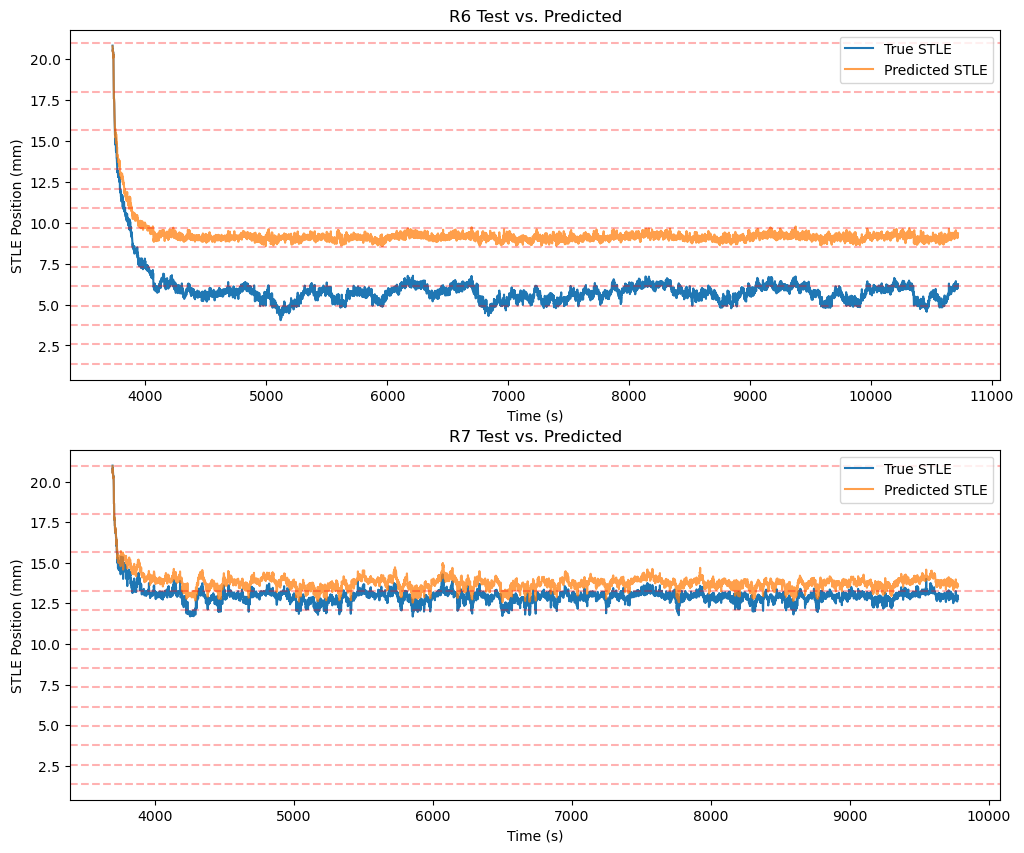

In [13]:
location_list_afit = ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
       'px11', 'px12', 'px13', 'px14']

fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(12,10))

j = 0

for i in test_run:
    result_subset = test_set[test_set['Run'] == i]
    axes[j].plot(result_subset['x1'],label='True STLE')
    axes[j].plot(result_subset['pred'],label='Predicted STLE',alpha=0.75)
    axes[j].set_xlabel('Time (s)')
    axes[j].set_ylabel('STLE Position (mm)')
    axes[j].legend()
    for k in location_list_afit:
         axes[j].axhline(y=afit[afit['Run']==i][k].iloc[0], color='red', linestyle='--',alpha=0.3)
    axes[j].set_title(f"{i}" + ' Test vs. Predicted')
    j += 1
    
plt.show()

# Linear Regression on AFIT

In [15]:
ss = StandardScaler()

# Else, use this plain data

train = R6.drop(['H','W','L','time','Run',
                       'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14'],axis=1)
test = pd.concat([R7,R8])
test = test.drop(['H','W','L','time','Run',
                 'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14'],axis=1)

X_train_scaled = ss.fit_transform(train.drop('x1',axis=1))
X_test_scaled = ss.transform(test.drop('x1',axis=1))

y_train = train['x1']
y_test = test['x1']

In [16]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge

In [17]:
lin_reg = LinearRegression()

In [18]:
lin_reg.fit(X_train_scaled,y_train)

LinearRegression()

In [19]:
y_pred_lin_reg = lin_reg.predict(X_test_scaled)

In [20]:
lin_reg.score(X_test_scaled, y_test)

0.9803233543164439

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
mean_squared_error(y_test, y_pred_lin_reg)

0.09420220689698645

In [23]:
test_full_lin_reg = afit[(afit['Run']=='R7') | (afit['Run']=='R8')]
test_full_lin_reg['pred'] = y_pred_lin_reg

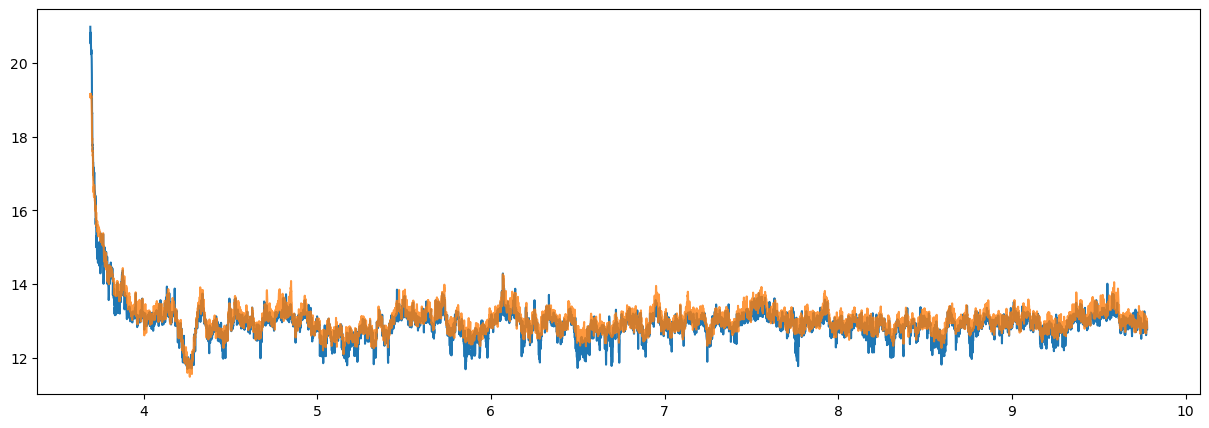

In [24]:
plt.figure(figsize=(15,5))

plt.plot(test_full_lin_reg[test_full_lin_reg['Run']=='R7']['time'],test_full_lin_reg[test_full_lin_reg['Run']=='R7']['x1'], label='True STLE')
plt.plot(test_full_lin_reg[test_full_lin_reg['Run']=='R7']['time'],test_full_lin_reg[test_full_lin_reg['Run']=='R7']['pred'],label='Predicted STLE',alpha=0.8)

#for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          #'px11', 'px12', 'px13', 'px14']:
    #plt.axhline(R8_rolled_result[j].iloc[0],color='red',alpha=.3)
    
plt.show()

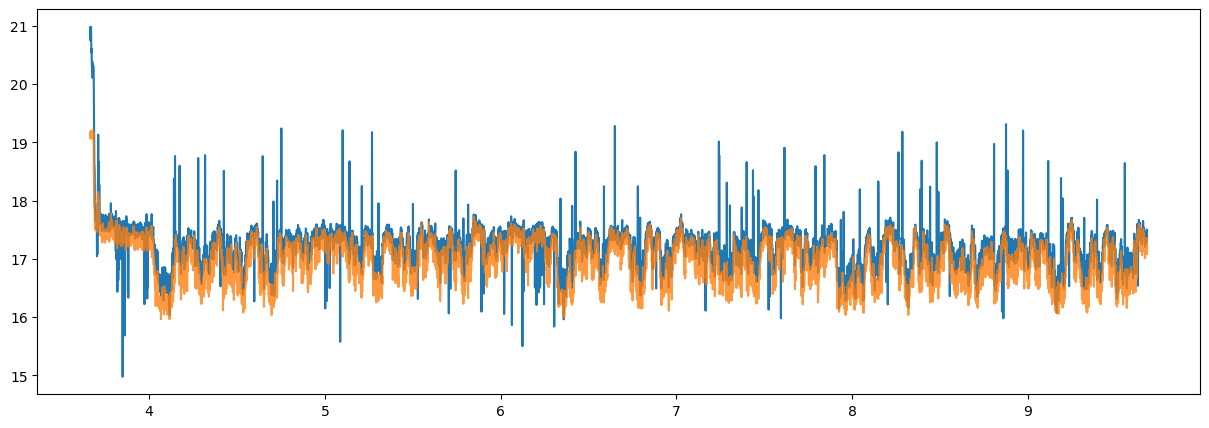

In [25]:
plt.figure(figsize=(15,5))

plt.plot(test_full_lin_reg[test_full_lin_reg['Run']=='R8']['time'],test_full_lin_reg[test_full_lin_reg['Run']=='R8']['x1'], label='True STLE')
plt.plot(test_full_lin_reg[test_full_lin_reg['Run']=='R8']['time'],test_full_lin_reg[test_full_lin_reg['Run']=='R8']['pred'],label='Predicted STLE',alpha=0.8)

#for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          #'px11', 'px12', 'px13', 'px14']:
    #plt.axhline(R8_rolled_result[j].iloc[0],color='red',alpha=.3)
    
plt.show()

# KNN Regressor on AFIT

In [26]:
from sklearn.neighbors import KNeighborsRegressor as KNR

In [34]:
ss = StandardScaler()

# Else, use this plain data

train = R6.drop(['H','W','L','time','Run',
                       'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14'],axis=1)
test = pd.concat([R7,R8])
test = test.drop(['H','W','L','time','Run',
                 'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14'],axis=1)

X_train_scaled = ss.fit_transform(train.drop('x1',axis=1))
X_test_scaled = ss.transform(test.drop('x1',axis=1))

y_train = train['x1']
y_test = test['x1']

In [35]:
knr = KNR()

In [40]:
knr.fit(X_train_scaled,y_train)

KNeighborsRegressor()

In [41]:
knr.score(X_test_scaled,y_test)

0.9869806366362365

In [43]:
y_pred_knr = knr.predict(X_test_scaled)

In [44]:
test_full_knr = afit[(afit['Run']=='R7') | (afit['Run']=='R8')]
test_full_knr['pred'] = y_pred_knr

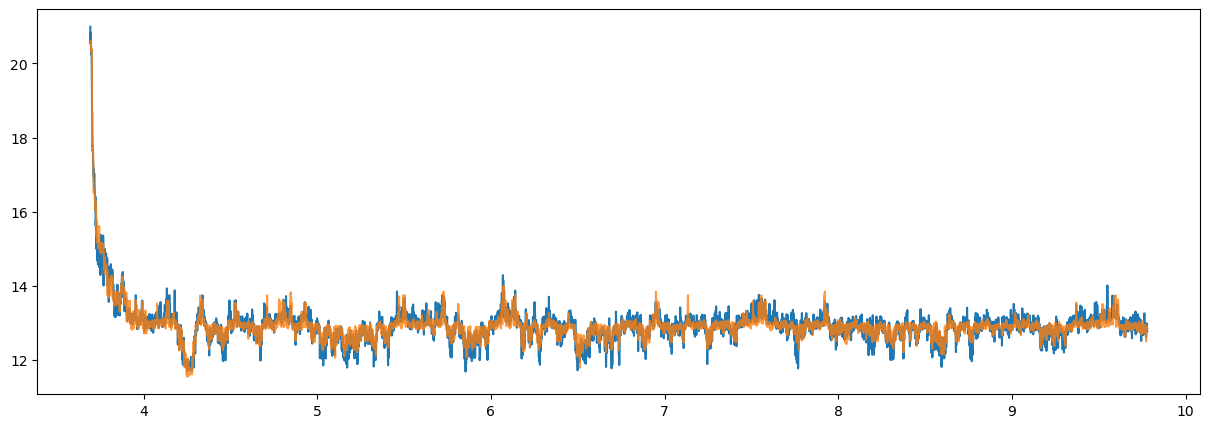

In [45]:
plt.figure(figsize=(15,5))

plt.plot(test_full_knr[test_full_knr['Run']=='R7']['time'],test_full_knr[test_full_knr['Run']=='R7']['x1'], label='True STLE')
plt.plot(test_full_knr[test_full_knr['Run']=='R7']['time'],test_full_knr[test_full_knr['Run']=='R7']['pred'],label='Predicted STLE',alpha=0.8)

#for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          #'px11', 'px12', 'px13', 'px14']:
    #plt.axhline(R8_rolled_result[j].iloc[0],color='red',alpha=.3)
    
plt.show()

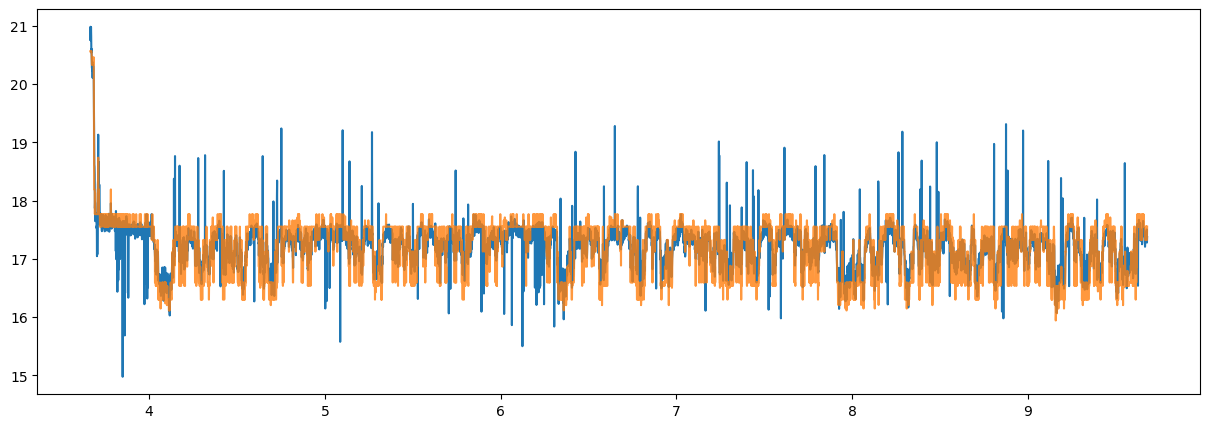

In [46]:
plt.figure(figsize=(15,5))

plt.plot(test_full_knr[test_full_knr['Run']=='R8']['time'],test_full_knr[test_full_knr['Run']=='R8']['x1'], label='True STLE')
plt.plot(test_full_knr[test_full_knr['Run']=='R8']['time'],test_full_knr[test_full_knr['Run']=='R8']['pred'],label='Predicted STLE',alpha=0.8)

#for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          #'px11', 'px12', 'px13', 'px14']:
    #plt.axhline(R8_rolled_result[j].iloc[0],color='red',alpha=.3)
    
plt.show()

# Random Forest Regressor on AFIT

In [47]:
from sklearn.ensemble import RandomForestRegressor

In [48]:
train = R6.drop(['H','W','L','time','Run',
                       'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14'],axis=1)
test = pd.concat([R7,R8])
test = test.drop(['H','W','L','time','Run',
                 'px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          'px11', 'px12', 'px13', 'px14'],axis=1)

X_train = train.drop('x1',axis=1)
X_test = test.drop('x1',axis=1)
y_train = train['x1']
y_test = test['x1']

In [49]:
rfr = RandomForestRegressor()

In [51]:
rfr.fit(X_train_scaled,y_train)

RandomForestRegressor()

In [52]:
rfr.score(X_test_scaled,y_test)

0.9900891526613113

In [53]:
y_pred_rfr = rfr.predict(X_test_scaled)

In [54]:
mean_squared_error(y_test, y_pred_rfr)

0.047448315456726675

In [55]:
test_full_rfr = afit[(afit['Run']=='R7') | (afit['Run']=='R8')]
test_full_rfr['pred'] = y_pred_rfr

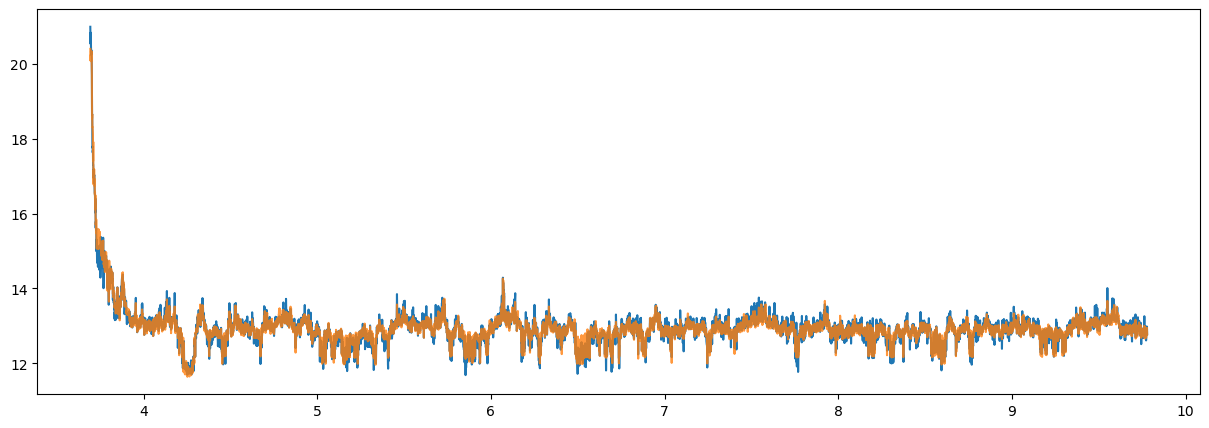

In [56]:
plt.figure(figsize=(15,5))

plt.plot(test_full_rfr[test_full_rfr['Run']=='R7']['time'],test_full_rfr[test_full_rfr['Run']=='R7']['x1'], label='True STLE')
plt.plot(test_full_rfr[test_full_rfr['Run']=='R7']['time'],test_full_rfr[test_full_rfr['Run']=='R7']['pred'],label='Predicted STLE',alpha=0.8)

#for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          #'px11', 'px12', 'px13', 'px14']:
    #plt.axhline(R8_rolled_result[j].iloc[0],color='red',alpha=.3)
    
plt.show()

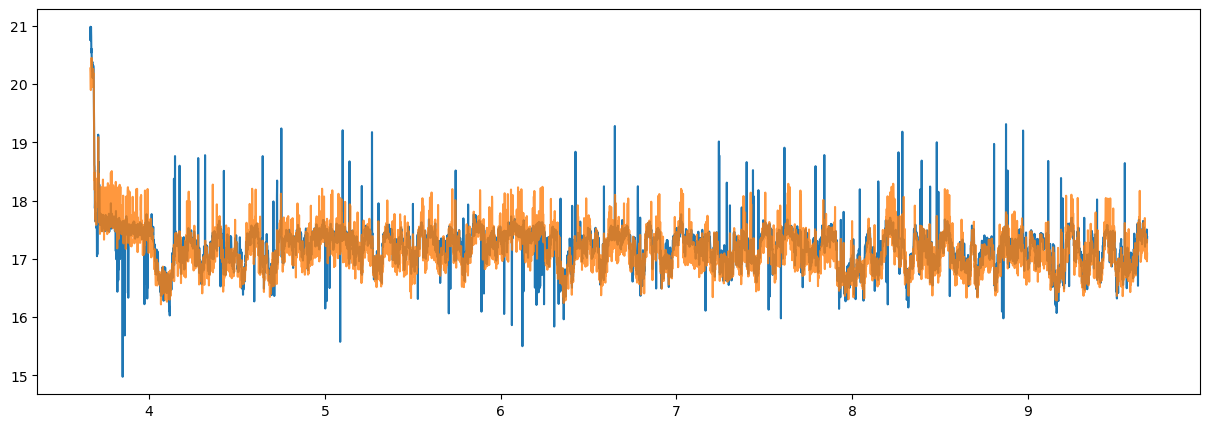

In [57]:
plt.figure(figsize=(15,5))

plt.plot(test_full_rfr[test_full_rfr['Run']=='R8']['time'],test_full_rfr[test_full_rfr['Run']=='R8']['x1'], label='True STLE')
plt.plot(test_full_rfr[test_full_rfr['Run']=='R8']['time'],test_full_rfr[test_full_rfr['Run']=='R8']['pred'],label='Predicted STLE',alpha=0.8)

#for j in ['px1', 'px2', 'px3', 'px4', 'px5', 'px6', 'px7', 'px8', 'px9', 'px10',
          #'px11', 'px12', 'px13', 'px14']:
    #plt.axhline(R8_rolled_result[j].iloc[0],color='red',alpha=.3)
    
plt.show()